# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [47]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime;

%matplotlib inline

In [48]:
# Ignore miscellaneous warnings from Jupiter Lab that clutter up the output (e.g. future methods that will be deprecated)
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [50]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [51]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [52]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [53]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19161156,
            "id": 1,
            "last_updated": 1664196879,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 363921750559,
                    "percent_change_1h": 1.39031949094469,
                    "percent_change_24h": 0.33401595550399,
                    "percent_change_7d": -1.44429370568313,
                    "percentage_change_1h": 1.39031949094469,
                    "percentage_change_24h": 0.33401595550399,
                    "percentage_change_7d": -1.44429370568313,
                    "price": 19156.43,
                    "volume_24h": 35528013333
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19161156,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies

In [54]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120688358,
            "id": 1027,
            "last_updated": 1664196880,
            "max_supply": 120688358,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 158163792982,
                    "percent_change_1h": 1.85109797032291,
                    "percent_change_24h": -0.0909636392233449,
                    "percent_change_7d": -0.988299640672636,
                    "percentage_change_1h": 1.85109797032291,
                    "percentage_change_24h": -0.0909636392233449,
                    "percentage_change_7d": -0.988299640672636,
                    "price": 1322.65,
                    "volume_24h": 14276026516
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120688358,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "nu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [55]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for BTC is ${btc_price}")

The price for BTC is $19156.43


In [56]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for ETH is ${eth_price}")

The price for ETH is $1322.65


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [57]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"The current value of the {btc_coins} BTC coins is ${btc_value:0.2f}")

The current value of the 1.2 BTC coins is $22987.72


In [58]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"The current value of the {eth_coins} ETH coins is ${eth_value:0.2f}")

The current value of the 5.3 ETH coins is $7010.05


In [59]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current value of the crypto wallet is ${total_crypto_wallet:0.2f}")

The current value of the crypto wallet is $29997.76


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [60]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [61]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))
        
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [62]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Get the last/previous business day
# ... first, get current date
curent_date_time = pd.Timestamp(datetime.datetime.now())
# ... second, determine offset in days to get to last business day
# ... (e.g. on Sat - offset = 1, on Sun - offset = 2)
offset = pd.tseries.offsets.BusinessDay(n=1)
# ... third, subtract offset from current date to get to previous business date
prev_bizday_date_time = curent_date_time - offset
# ... fourth, remove time (to get only date) and convert to ISO format (returns str)
prev_bizday_date = prev_bizday_date_time.date().isoformat()

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp(str(prev_bizday_date), tz="America/New_York").isoformat()
end_date = pd.Timestamp(str(prev_bizday_date), tz="America/New_York").isoformat()

display(start_date)
display(end_date)

'2022-09-23T00:00:00-04:00'

'2022-09-23T00:00:00-04:00'

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [63]:
# Method 1: Separating and concatenating each ticker separately

# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_separate = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
display(df_portfolio_separate)

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-09-23 04:00:00+00:00  370.58  370.62  363.29  367.95  121574096   

                                                    AGG                      \
                          trade_count        vwap  open   high    low close   
timestamp                                                                     
2022-09-23 04:00:00+00:00      838774  367.579806  97.4  97.45  96.89  97.2   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-09-23 04:00:00+00:00  11053650       41351  97.135798

In [64]:
# Method 2: A more generic way to get current closing prices of the portfolio with the symbols in ticker list
# (i.e. by iterating over the symbols in the ticket list)

# Create an empty list to hold the DataFrame of prices for each ticker
ticker_df_list = []

# Iterate over each ticker symbol in the tickers list
for ticker in tickers:
    # Reorganize the DataFrame
    ticker_df = df_portfolio[df_portfolio['symbol']==ticker].drop('symbol', axis=1)    
    # Append the DataFrame to the list
    ticker_df_list.append(ticker_df)
    
# Concatenate the ticker DataFrames
df_portfolio = pd.concat(ticker_df_list,axis=1, keys=tickers)

# Review the first 5 rows of the Alpaca DataFrame
display(df_portfolio)

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-09-23 04:00:00+00:00  370.58  370.62  363.29  367.95  121574096   

                                                    AGG                      \
                          trade_count        vwap  open   high    low close   
timestamp                                                                     
2022-09-23 04:00:00+00:00      838774  367.579806  97.4  97.45  96.89  97.2   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-09-23 04:00:00+00:00  11053650       41351  97.135798

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [65]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price_srs = df_portfolio["AGG"]["close"]
agg_close_price = agg_close_price_srs[0]

# Print the AGG closing price
display(f"The current price of AGG is ${agg_close_price:0.2f}")


'The current price of AGG is $97.20'

In [66]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price_srs = df_portfolio["SPY"]["close"]
spy_close_price = spy_close_price_srs[0]

# Print the SPY closing price
display(f"The current price of SPY is ${spy_close_price:0.2f}")


'The current price of SPY is $367.95'

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [67]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the {agg_shares} AGG shares is ${agg_value:0.2f}")

The current value of the 200 AGG shares is $19440.00


In [68]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the {spy_shares} SPY shares is ${spy_value:0.2f}")

The current value of the 110 SPY shares is $40474.50


In [69]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current value of the stock and bond portfolio is ${total_stocks_bonds:0.2f}")

The current value of the stock and bond portfolio is $59914.50


In [70]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The current value of the entire savings portfolio is ${total_portfolio:0.2f}")

The current value of the entire savings portfolio is $89912.26


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [71]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)    

[29997.761, 59914.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [72]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,29997.761
stock/bond,59914.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - Crytpo & Stock/Bond'}, ylabel='amount'>

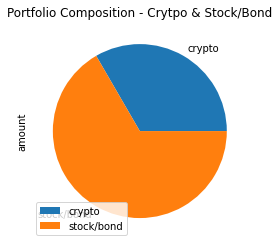

In [73]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition - Crytpo & Stock/Bond')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [74]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [75]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

print()
print("Summary:")
print("--------")
print(f"The current value of the entire savings portfolio is ${total_portfolio:0.2f}")
print(f"Required emergency fund is ${emergency_fund_value:0.2f}")
print("--------")

if (total_portfolio > emergency_fund_value):
    print("Congratulations!  You have enough funds in your portfolio to fund your emergency portfolio")  
elif (total_portfolio == emergency_fund_value):
    print("Congratulations, you have reached enough funds in your portfolio to match your emergency portfolio")  
else:
    print(f"Unfortunately, you do not have enough funds in your portfolio to fund your emergency portfolio.  You will need an additional ${(emergency_fund_value - total_portfolio):.2f}")  
print("--------")
print()


Summary:
--------
The current value of the entire savings portfolio is $89912.26
Required emergency fund is $36000.00
--------
Congratulations!  You have enough funds in your portfolio to fund your emergency portfolio
--------



## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [76]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

# Determine end date
# ... from earlier in the challenge above, have already defined the current data/time ("curent_date_time = pd.Timestamp(datetime.datetime.now())")
# ... offset -1 day
end_date_time = curent_date_time - datetime.timedelta(days = 1)
# Determine start date 
# ... minus 3 years (3 * 365 days) from current/end date
start_date_time = end_date_time - datetime.timedelta(days = (3 * 365))
# Remove time (to get only date) and convert to ISO format (returns str)
start_date = start_date_time.date().isoformat()
end_date = end_date_time.date().isoformat()

display(type(start_date))
display(type(end_date))
print(f"start_date = {start_date}")
print(f"end_date = {end_date}")


str

str

start_date = 2019-09-26
end_date = 2022-09-25


In [77]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

portfolio_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Method 1: Separating and concatenating each ticker separately

# Reorganize the DataFrame
# Separate ticker data
SPY = portfolio_prices_df[portfolio_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = portfolio_prices_df[portfolio_prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_df_separate = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
print("Method 1")
display(df_portfolio_df_separate.head())
display(df_portfolio_df_separate.tail())
print()

# Method 2: A more generic way to get current closing prices of the portfolio with the symbols in ticker list
# (i.e. by iterating over the symbols in the ticket list)

# Create an empty list to hold the DataFrame of prices for each ticker
ticker_df_list = []

# Iterate over each ticker symbol in the tickers list
for ticker in tickers:
    # Reorganize the DataFrame
    ticker_df = portfolio_prices_df[portfolio_prices_df['symbol']==ticker].drop('symbol', axis=1)    
    # Append the DataFrame to the list
    ticker_df_list.append(ticker_df)
    
# Concatenate the ticker DataFrames
portfolio_prices_df = pd.concat(ticker_df_list,axis=1, keys=tickers)

# Review the first 5 rows of the Alpaca DataFrame
print("Method 2")
display(portfolio_prices_df.head())
display(portfolio_prices_df.tail())
print()


Method 1


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-09-26 04:00:00+00:00  297.62  297.8600  295.45  297.00   58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.69  295.40   85194715   
2019-09-30 04:00:00+00:00  295.98  297.5500  295.92  296.77   52771311   
2019-10-01 04:00:00+00:00  297.67  298.4550  293.00  293.24   90160482   
2019-10-02 04:00:00+00:00  291.49  291.5100  286.64  288.06  125924074   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-09-26 04:00:00+00:00      329411  296.847045  113.00  113.1000  112.935   
2019-09-27 04:00:00+00:00      454922  295.623896  113.00  113.1650  113.000   
2019-09-30 04:00:00+00:00      258680  296.786007  112.93  113.2700  112.920   
2019-10-01 04:00:00+00:00      422407  294.867498  112.71  113.2500  112.630   
2019-10-02 04:00:00+00:00      608988  288.821147  113.19  113.3075  113.090   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-09-26 04:00:00+00:00  113.00  4869355       11034  113.027123  
2019-09-27 04:00:00+00:00  113.14  4652474       15910  113.108829  
2019-09-30 04:00:00+00:00  113.17  6638203       20269  113.172636  
2019-10-01 04:00:00+00:00  113.12  5982470       30567  113.081002  
2019-10-02 04:00:00+00:00  113.20  9571687       23424  113.229809

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-09-19 04:00:00+00:00  382.27  388.55  382.1784  388.55   72766494   
2022-09-20 04:00:00+00:00  385.10  386.12  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.31  377.3800  377.45  104302139   
2022-09-22 04:00:00+00:00  376.50  378.30  373.4400  374.22   88922900   
2022-09-23 04:00:00+00:00  370.58  370.62  363.2900  367.95  121574096   

                                                     AGG                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2022-09-19 04:00:00+00:00      492471  386.239339  98.54  98.8400  98.4800   
2022-09-20 04:00:00+00:00      555454  384.152364  98.20  98.4000  98.0800   
2022-09-21 04:00:00+00:00      807310  383.197346  98.40  98.6001  97.8600   
2022-09-22 04:00:00+00:00      630401  375.330794  97.90  97.9200  97.4039   
2022-09-23 04:00:00+00:00      838774  367.579806  97.40  97.4500  96.8900   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-09-19 04:00:00+00:00  98.68   5978949       18815  98.677767  
2022-09-20 04:00:00+00:00  98.24  11210119       22324  98.237305  
2022-09-21 04:00:00+00:00  98.55   6674502       32613  98.321112  
2022-09-22 04:00:00+00:00  97.50   7092118       25072  97.595666  
2022-09-23 04:00:00+00:00  97.20  11053650       41351  97.135798


Method 2


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-09-26 04:00:00+00:00  297.62  297.8600  295.45  297.00   58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.69  295.40   85194715   
2019-09-30 04:00:00+00:00  295.98  297.5500  295.92  296.77   52771311   
2019-10-01 04:00:00+00:00  297.67  298.4550  293.00  293.24   90160482   
2019-10-02 04:00:00+00:00  291.49  291.5100  286.64  288.06  125924074   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-09-26 04:00:00+00:00      329411  296.847045  113.00  113.1000  112.935   
2019-09-27 04:00:00+00:00      454922  295.623896  113.00  113.1650  113.000   
2019-09-30 04:00:00+00:00      258680  296.786007  112.93  113.2700  112.920   
2019-10-01 04:00:00+00:00      422407  294.867498  112.71  113.2500  112.630   
2019-10-02 04:00:00+00:00      608988  288.821147  113.19  113.3075  113.090   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-09-26 04:00:00+00:00  113.00  4869355       11034  113.027123  
2019-09-27 04:00:00+00:00  113.14  4652474       15910  113.108829  
2019-09-30 04:00:00+00:00  113.17  6638203       20269  113.172636  
2019-10-01 04:00:00+00:00  113.12  5982470       30567  113.081002  
2019-10-02 04:00:00+00:00  113.20  9571687       23424  113.229809

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-09-19 04:00:00+00:00  382.27  388.55  382.1784  388.55   72766494   
2022-09-20 04:00:00+00:00  385.10  386.12  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.31  377.3800  377.45  104302139   
2022-09-22 04:00:00+00:00  376.50  378.30  373.4400  374.22   88922900   
2022-09-23 04:00:00+00:00  370.58  370.62  363.2900  367.95  121574096   

                                                     AGG                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2022-09-19 04:00:00+00:00      492471  386.239339  98.54  98.8400  98.4800   
2022-09-20 04:00:00+00:00      555454  384.152364  98.20  98.4000  98.0800   
2022-09-21 04:00:00+00:00      807310  383.197346  98.40  98.6001  97.8600   
2022-09-22 04:00:00+00:00      630401  375.330794  97.90  97.9200  97.4039   
2022-09-23 04:00:00+00:00      838774  367.579806  97.40  97.4500  96.8900   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-09-19 04:00:00+00:00  98.68   5978949       18815  98.677767  
2022-09-20 04:00:00+00:00  98.24  11210119       22324  98.237305  
2022-09-21 04:00:00+00:00  98.55   6674502       32613  98.321112  
2022-09-22 04:00:00+00:00  97.50   7092118       25072  97.595666  
2022-09-23 04:00:00+00:00  97.20  11053650       41351  97.135798

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [78]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_60stock_40bond_30yr_weight = MCSimulation(
    portfolio_data = portfolio_prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_60stock_40bond_30yr_weight.portfolio_data.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-09-26 04:00:00+00:00  297.62  297.8600  295.45  297.00   58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.69  295.40   85194715   
2019-09-30 04:00:00+00:00  295.98  297.5500  295.92  296.77   52771311   
2019-10-01 04:00:00+00:00  297.67  298.4550  293.00  293.24   90160482   
2019-10-02 04:00:00+00:00  291.49  291.5100  286.64  288.06  125924074   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-26 04:00:00+00:00      329411  296.847045          NaN  113.00   
2019-09-27 04:00:00+00:00      454922  295.623896    -0.005387  113.00   
2019-09-30 04:00:00+00:00      258680  296.786007     0.004638  112.93   
2019-10-01 04:00:00+00:00      422407  294.867498    -0.011895  112.71   
2019-10-02 04:00:00+00:00      608988  288.821147    -0.017665  113.19   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-09-26 04:00:00+00:00  113.1000  112.935  113.00  4869355       11034   
2019-09-27 04:00:00+00:00  113.1650  113.000  113.14  4652474       15910   
2019-09-30 04:00:00+00:00  113.2700  112.920  113.17  6638203       20269   
2019-10-01 04:00:00+00:00  113.2500  112.630  113.12  5982470       30567   
2019-10-02 04:00:00+00:00  113.3075  113.090  113.20  9571687       23424   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-26 04:00:00+00:00  113.027123          NaN  
2019-09-27 04:00:00+00:00  113.108829     0.001239  
2019-09-30 04:00:00+00:00  113.172636     0.000265  
2019-10-01 04:00:00+00:00  113.081002    -0.000442  
2019-10-02 04:00:00+00:00  113.229809     0.000707

In [79]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60stock_40bond_30yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996371,0.994805,1.011689,1.010860,0.998672,1.003404,1.003795,1.004858,0.992570,0.998741,...,1.000055,1.007735,1.028990,1.009408,1.004700,0.993593,0.997214,1.006018,0.990217,1.003767
2,0.986755,0.987278,1.012403,1.001551,1.004482,1.020832,0.997658,0.987082,0.993746,0.994090,...,0.989689,1.014226,1.030932,1.009746,1.001510,0.996673,0.993187,1.010725,1.002282,1.009012
3,0.964688,0.992586,0.996136,1.016995,1.011074,1.016020,1.007807,0.995971,1.010735,1.000795,...,0.981606,1.017857,1.029491,1.010935,1.008226,0.999238,0.985033,1.015129,1.017734,1.005656
4,0.964752,0.988273,0.982290,1.024906,1.015894,1.015073,1.024365,0.988201,1.013269,1.025782,...,0.992171,1.030948,1.025167,1.015764,0.988564,1.001081,0.983012,1.019638,1.016435,1.008548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.057926,8.031170,7.910265,2.608237,1.586923,1.933777,20.732843,0.315666,4.062193,6.170905,...,5.045834,34.936106,2.275632,0.957210,2.573172,0.705430,3.007928,3.276133,3.728491,3.918763
7557,3.037822,8.004310,7.895686,2.644296,1.585426,1.928490,20.448571,0.314023,4.090340,6.091562,...,5.087461,35.245042,2.268124,0.977605,2.619762,0.715193,3.049230,3.297178,3.695782,3.942769
7558,3.009885,8.097695,7.826967,2.643213,1.582237,1.939069,20.466476,0.319098,4.121334,6.067710,...,5.070564,35.261782,2.284317,0.978457,2.629415,0.716510,3.040616,3.303561,3.627605,3.970013
7559,3.003422,8.029696,7.823900,2.635590,1.578384,1.970070,20.433326,0.317122,4.179011,6.085614,...,5.090417,35.148965,2.265503,0.972141,2.575071,0.717237,3.037765,3.275126,3.635233,3.952040


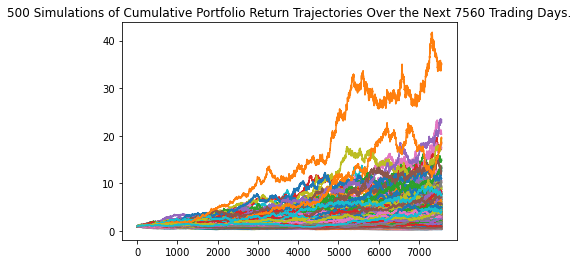

In [80]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
line_plot_60stock_40bond_30yr_weight = MC_60stock_40bond_30yr_weight.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

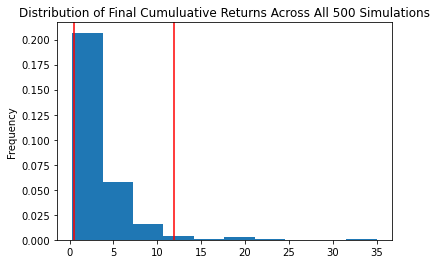

In [81]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
distribution_plot_60stock_40bond_30yr_weight = MC_60stock_40bond_30yr_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [82]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
table_60stock_40bond_30yr_weight = MC_60stock_40bond_30yr_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(table_60stock_40bond_30yr_weight)

count           500.000000
mean              3.303952
std               3.305420
min               0.292040
25%               1.415593
50%               2.347517
75%               4.031292
max              34.998632
95% CI Lower      0.543026
95% CI Upper     11.857528
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [83]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock and bond portfolio is ${total_stocks_bonds:0.2f}")

The current value of the stock and bond portfolio is $59914.50


In [84]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_95per = table_60stock_40bond_30yr_weight[8]
ci_upper_95per = table_60stock_40bond_30yr_weight[9]

ci_lower_thirty_cumulative_return = round(ci_lower_95per * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(ci_upper_95per * total_stocks_bonds, 2)

# Print the result of your calculations
print()
print(f"There is a 95% chance that the current stock and bond portfolio value of ${total_stocks_bonds:0.2f},"
      f" invested in 60% stocks and 40% bonds over the next 30 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that the current stock and bond portfolio value of $59914.50, invested in 60% stocks and 40% bonds over the next 30 years will end within the range of $32535.14 and $710437.83.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [85]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_80stock_20bond_10yr_weight = MCSimulation(
    portfolio_data = portfolio_prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_80stock_20bond_10yr_weight.portfolio_data.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-09-26 04:00:00+00:00  297.62  297.8600  295.45  297.00   58758157   
2019-09-27 04:00:00+00:00  297.87  297.9465  293.69  295.40   85194715   
2019-09-30 04:00:00+00:00  295.98  297.5500  295.92  296.77   52771311   
2019-10-01 04:00:00+00:00  297.67  298.4550  293.00  293.24   90160482   
2019-10-02 04:00:00+00:00  291.49  291.5100  286.64  288.06  125924074   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-09-26 04:00:00+00:00      329411  296.847045          NaN  113.00   
2019-09-27 04:00:00+00:00      454922  295.623896    -0.005387  113.00   
2019-09-30 04:00:00+00:00      258680  296.786007     0.004638  112.93   
2019-10-01 04:00:00+00:00      422407  294.867498    -0.011895  112.71   
2019-10-02 04:00:00+00:00      608988  288.821147    -0.017665  113.19   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-09-26 04:00:00+00:00  113.1000  112.935  113.00  4869355       11034   
2019-09-27 04:00:00+00:00  113.1650  113.000  113.14  4652474       15910   
2019-09-30 04:00:00+00:00  113.2700  112.920  113.17  6638203       20269   
2019-10-01 04:00:00+00:00  113.2500  112.630  113.12  5982470       30567   
2019-10-02 04:00:00+00:00  113.3075  113.090  113.20  9571687       23424   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-09-26 04:00:00+00:00  113.027123          NaN  
2019-09-27 04:00:00+00:00  113.108829     0.001239  
2019-09-30 04:00:00+00:00  113.172636     0.000265  
2019-10-01 04:00:00+00:00  113.081002    -0.000442  
2019-10-02 04:00:00+00:00  113.229809     0.000707

In [86]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80stock_20bond_10yr_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989431,0.991991,0.991644,1.024043,0.999150,1.007679,0.996786,0.997690,0.982891,0.994261,...,1.010164,1.011996,0.991604,1.002609,1.010931,0.994951,0.980704,1.013451,0.986502,0.992708
2,0.991836,0.998314,1.001574,1.004758,0.987900,0.991105,0.987363,1.000350,1.007168,0.990543,...,0.996025,0.998126,0.989786,1.010981,0.996875,1.011165,0.971716,1.004580,0.975308,0.982613
3,0.973120,1.000103,0.983770,1.003532,0.971678,0.997727,0.991715,0.986459,1.013001,0.969025,...,1.000846,0.989045,1.006358,1.024300,0.985395,0.999670,0.987899,0.997853,1.001904,1.000156
4,0.969575,1.022197,0.992178,1.017031,0.963202,1.015080,0.985228,0.993446,1.025832,0.974778,...,1.006955,0.981122,1.004727,1.023950,0.994108,0.994920,1.009819,1.012180,0.995724,0.993349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.845232,0.786320,3.227389,3.574282,2.206572,2.429053,1.497022,3.011849,3.170521,0.530209,...,0.961546,1.073110,0.618036,3.467725,0.784313,0.706377,3.085452,2.277315,2.483541,1.959831
2517,2.869549,0.790126,3.216809,3.568121,2.205720,2.391574,1.509516,2.994565,3.128254,0.540418,...,0.957495,1.085803,0.603495,3.532243,0.782027,0.710473,3.071324,2.234778,2.508816,1.962931
2518,2.928547,0.799863,3.256369,3.568134,2.186751,2.375399,1.480054,2.981240,3.137800,0.533774,...,0.980771,1.060739,0.614453,3.524319,0.783499,0.708015,3.069080,2.212356,2.487919,1.931218
2519,2.990441,0.790375,3.254404,3.570861,2.181207,2.411600,1.466858,2.972331,3.157758,0.543120,...,1.003609,1.046378,0.620285,3.556914,0.788038,0.699555,3.058524,2.189235,2.485907,1.959698


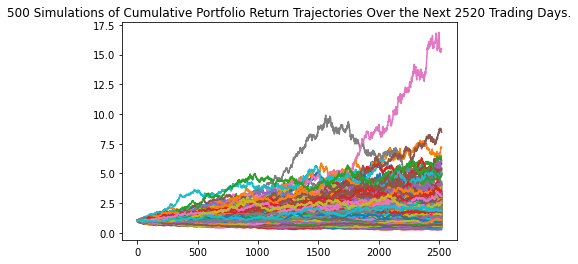

In [87]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
line_plot_80stock_20bond_10yr_weight = MC_80stock_20bond_10yr_weight.plot_simulation()

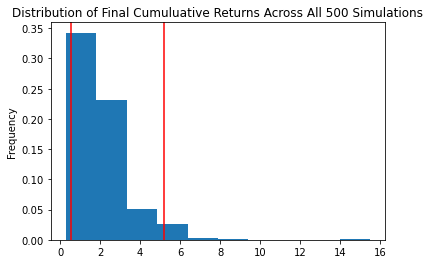

In [88]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
distribution_plot_80stock_20bond_10yr_weight = MC_80stock_20bond_10yr_weight.plot_distribution()

In [89]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
table_80stock_20bond_10yr_weight = MC_80stock_20bond_10yr_weight.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(table_80stock_20bond_10yr_weight)

count           500.000000
mean              2.034140
std               1.359677
min               0.276792
25%               1.114122
50%               1.730804
75%               2.576214
max              15.514099
95% CI Lower      0.541830
95% CI Upper      5.189271
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [90]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock and bond portfolio is ${total_stocks_bonds:0.2f}")

The current value of the stock and bond portfolio is $59914.50


In [91]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_95per = table_80stock_20bond_10yr_weight[8]
ci_upper_95per = table_80stock_20bond_10yr_weight[9]

ci_lower_thirty_cumulative_return = round(ci_lower_95per * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(ci_upper_95per * total_stocks_bonds, 2)

# Print the result of your calculations
print()
print(f"There is a 95% chance that the current stock and bond portfolio value of ${total_stocks_bonds:0.2f},"
      f" invested in 80% stocks and 20% bonds over the next 10 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that the current stock and bond portfolio value of $59914.50, invested in 80% stocks and 20% bonds over the next 10 years will end within the range of $32463.46 and $310912.6.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?